In [1]:
from pickle import load
from functools import partial
import healpy as hp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from chainconsumer import ChainConsumer

import src.forward_model as FM
import src.beam_functions as BF
import src.sky_models as SM
from anstey.generate import T_CMB
from src.spherical_harmonics import RealSphericalHarmonics, calc_spherical_harmonic_matrix
from src.nregions_models import pix_forward_model_pl, genopt_pix_forward_model_pl
from src.blockmat import BlockMatrix, BlockVector
RS = RealSphericalHarmonics()
from nregions_inference import nuarr
import nregions_inference as NRI
from scipy.optimize import curve_fit
from functools import partial
import alm_polynomial_inference as api
from src.inference import curve_fit_emcee
import src.observing as OBS
import src.map_making as MM
import src.spherical_harmonics as SH

from chainconsumer import ChainConsumer
from emcee import EnsembleSampler

alm2temp = 1/np.sqrt(4*np.pi)

In [11]:
from pygdsm import GlobalSkyModel

In [14]:
sm = GlobalSkyModel()
m = sm.generate(60)

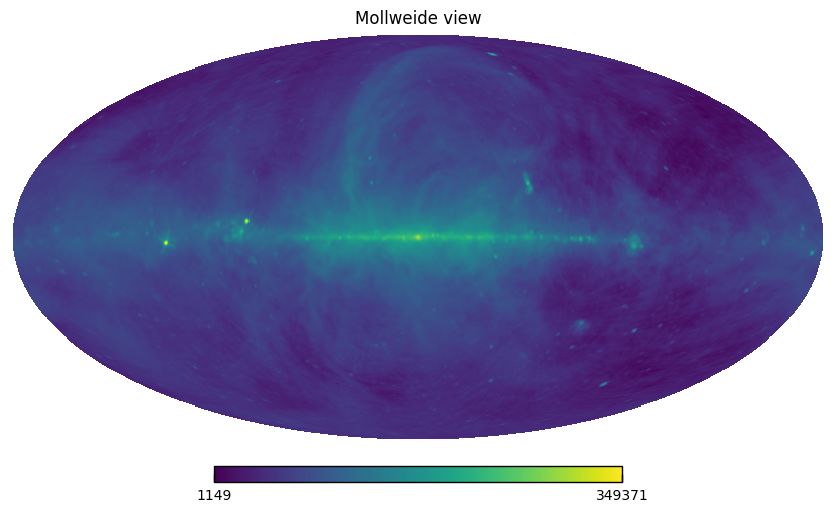

In [16]:
hp.mollview(m, norm='log')

3300.525843041695
4049.755793577922


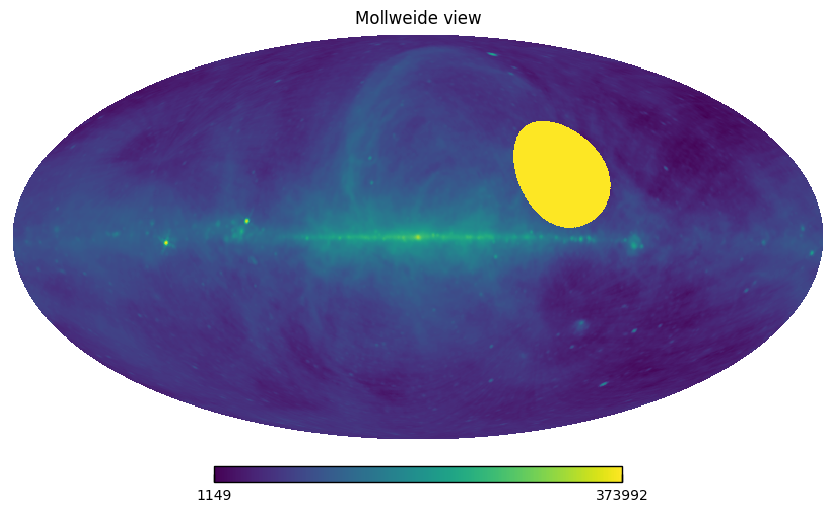

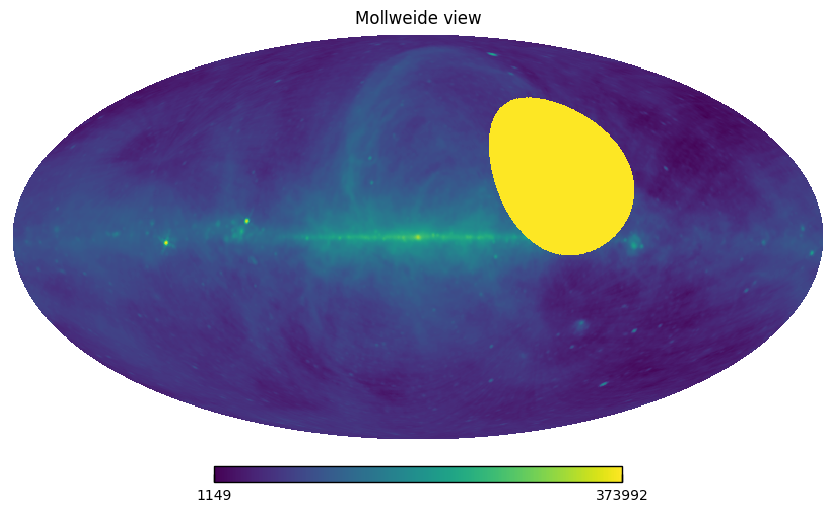

In [28]:
sm = GlobalSkyModel()
m = sm.generate(60)
vec = hp.ang2vec(np.pi / 2.7, -np.pi * 1.5 / 4)


# Take the average temperature in the disc 1
ipix_disc1 = hp.query_disc(nside=512, vec=vec, radius=np.radians(20))
avg1 = np.mean(m[ipix_disc1])

n1 = np.array(m)
n1[ipix_disc1] = m.max()
hp.mollview(n1, norm='log')
print(avg1)

# Take the average temperature in the disc 2
ipix_disc1 = hp.query_disc(nside=512, vec=vec, radius=np.radians(30))
avg1 = np.mean(m[ipix_disc1])

n1 = np.array(m)
n1[ipix_disc1] = m.max()
hp.mollview(n1, norm='log')
print(avg1)

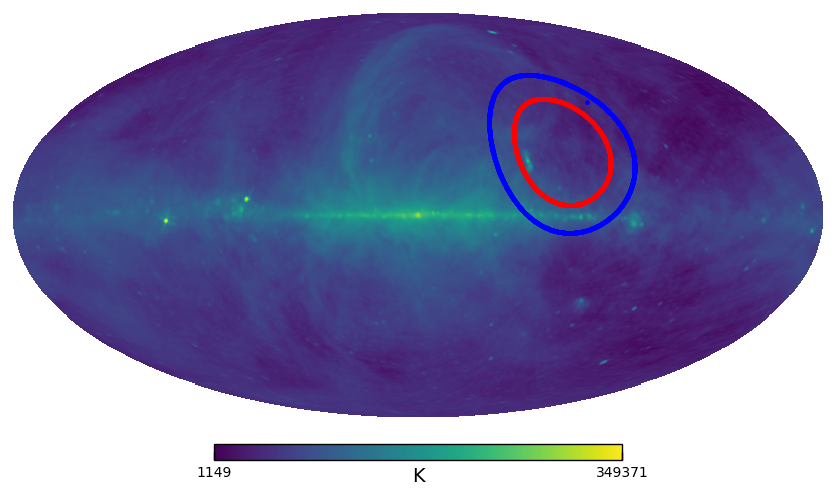

In [39]:


# Generate the sky model
sm    = GlobalSkyModel()
m     = sm.generate(60)
vec   = hp.ang2vec(np.pi / 2.7, -np.pi * 1.5 / 4)
nside = 512

# Function to plot the border of a disc
def plot_disc_border(nside, vec, radius, color='red'):
    # Get the pixels within the disc
    ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=radius)
    
    # Get all neighbors for the disc pixels
    neighbors = hp.get_all_neighbours(nside, ipix_disc)
    
    # Find boundary pixels (pixels in the disc with at least one neighbor outside the disc)
    boundary_mask = ~np.isin(neighbors, ipix_disc).all(axis=0)
    boundary_pixels = ipix_disc[boundary_mask]
    
    # Convert boundary pixels to angles
    theta, phi = hp.pix2ang(nside, boundary_pixels)
    
    # Plot the boundary
    hp.projplot(theta, phi, 'o', color=color, markersize=2)

# Plot the original map
hp.mollview(m, norm='log', title="", unit='K')

# Plot the border of the first disc
plot_disc_border(nside=nside, vec=vec, radius=np.radians(20), color='red')

# Plot the border of the second disc
plot_disc_border(nside=nside, vec=vec, radius=np.radians(30), color='blue')
plt.savefig("fig/demonstrate_chrom_beam_coupling.pdf")
# Show the plot
plt.show()